In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, recall_score
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import catboost as cb
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
import xgboost
from imblearn.ensemble import BalancedBaggingClassifier 
from imblearn.ensemble import BalancedRandomForestClassifier 
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.shape

(39074, 16)

In [3]:
df.describe()

,id,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,is_rich
count,39074.000000,39074.000000,3.907400e+04,39074.000000,39074.000000,39074.000000,39074.000000,39074.000000
mean,29304.500000,38.694631,1.895940e+05,10.074576,1046.173875,87.393433,40.433895,0.239520
std,11279.836546,13.731323,1.058920e+05,2.572794,7302.852120,403.706583,12.373732,0.426796
min,9768.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,19536.250000,28.000000,1.174770e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,29304.500000,37.000000,1.781505e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,39072.750000,48.000000,2.371285e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,48841.000000,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39074 entries, 0 to 39073
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               39074 non-null  int64 
 1   age              39074 non-null  int64 
 2   workclass        39074 non-null  object
 3   fnlwgt           39074 non-null  int64 
 4   education        39074 non-null  object
 5   educational-num  39074 non-null  int64 
 6   marital-status   39074 non-null  object
 7   occupation       39074 non-null  object
 8   relationship     39074 non-null  object
 9   race             39074 non-null  object
 10  gender           39074 non-null  object
 11  capital-gain     39074 non-null  int64 
 12  capital-loss     39074 non-null  int64 
 13  hours-per-week   39074 non-null  int64 
 14  native-country   39074 non-null  object
 15  is_rich          39074 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 4.8+ MB


## Пропуски отсутствуют

In [5]:
df.isna().sum().sort_values(ascending=False)

id                 0
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
is_rich            0
dtype: int64

In [7]:
X = df.drop(["is_rich", "id", "education"], axis=1)
y = df['is_rich']

## Выборка несбалансирована

In [8]:
y.value_counts()

0    29715
1     9359
Name: is_rich, dtype: int64

## Разделение выборки с учетом несбалансированности

In [9]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y, test_size=0.15, random_state=42)

## Работа с выбросами

In [10]:
df.describe()

,id,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,is_rich
count,39074.000000,39074.000000,3.907400e+04,39074.000000,39074.000000,39074.000000,39074.000000,39074.000000
mean,29304.500000,38.694631,1.895940e+05,10.074576,1046.173875,87.393433,40.433895,0.239520
std,11279.836546,13.731323,1.058920e+05,2.572794,7302.852120,403.706583,12.373732,0.426796
min,9768.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,19536.250000,28.000000,1.174770e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,29304.500000,37.000000,1.781505e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,39072.750000,48.000000,2.371285e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,48841.000000,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


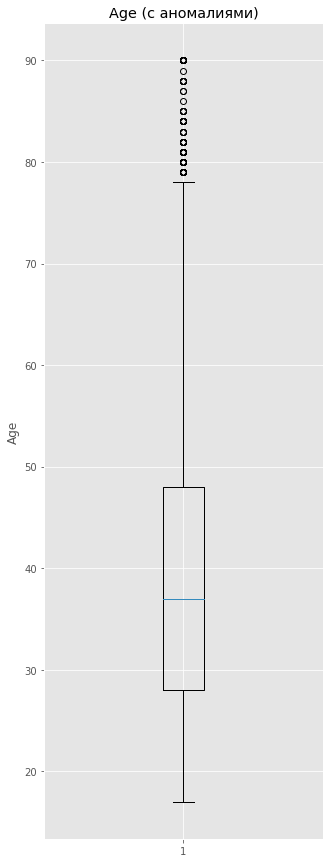

In [11]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 15))
ax.boxplot(train_x.age)
ax.set_ylabel('Age')
ax.set_title('Age (с аномалиями)')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [12]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries
boundaries = calculate_outliers(train_x.age)
boundaries

(-2.0, 78.0)

In [13]:
is_outlier = (train_x.age < boundaries[0]) | (train_x.age > boundaries[1]) 
is_outlier.sum()

161

In [14]:
train_x.loc[is_outlier, 'age'] = int(boundaries[1])
is_outlier = (train_x.age < boundaries[0]) | (train_x.age > boundaries[1]) 
is_outlier.sum()

0

In [15]:
boundaries = calculate_outliers(test_x.age)
boundaries

(-0.5, 75.5)

In [16]:
is_outlier = (test_x.age < boundaries[0]) | (test_x.age > boundaries[1]) 
is_outlier.sum()

43

In [17]:
test_x.loc[is_outlier, 'age'] = int(boundaries[1])
is_outlier = (test_x.age < boundaries[0]) | (test_x.age > boundaries[1]) 
is_outlier.sum()

0

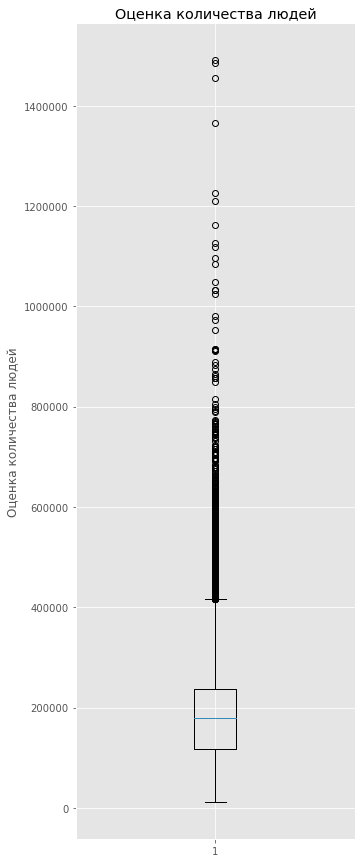

In [18]:
fig, ax = plt.subplots(figsize=(5, 15))
ax.boxplot(train_x.fnlwgt)
ax.set_ylabel('Оценка количества людей')
ax.set_title('Оценка количества людей')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [19]:
boundaries = calculate_outliers(train_x.fnlwgt)
boundaries

(-61738.125, 416372.875)

In [20]:
is_outlier = (train_x.fnlwgt < boundaries[0]) | (train_x.fnlwgt > boundaries[1])
is_outlier.sum()

1005

In [21]:
train_x.loc[is_outlier, 'fnlwgt'] = int(boundaries[1])
is_outlier = (train_x.fnlwgt < boundaries[0]) | (train_x.fnlwgt > boundaries[1]) 
is_outlier.sum()

0

In [22]:
boundaries = calculate_outliers(test_x.fnlwgt)
boundaries

(-64941.125, 418967.875)

In [23]:
is_outlier = (test_x.fnlwgt < boundaries[0]) | (test_x.fnlwgt > boundaries[1])
is_outlier.sum()

159

In [24]:
test_x.loc[is_outlier, 'fnlwgt'] = int(boundaries[1])
is_outlier = (test_x.fnlwgt < boundaries[0]) | (test_x.fnlwgt > boundaries[1]) 
is_outlier.sum()

0

In [25]:
boundaries = calculate_outliers(train_x["hours-per-week"])
boundaries

(32.5, 52.5)

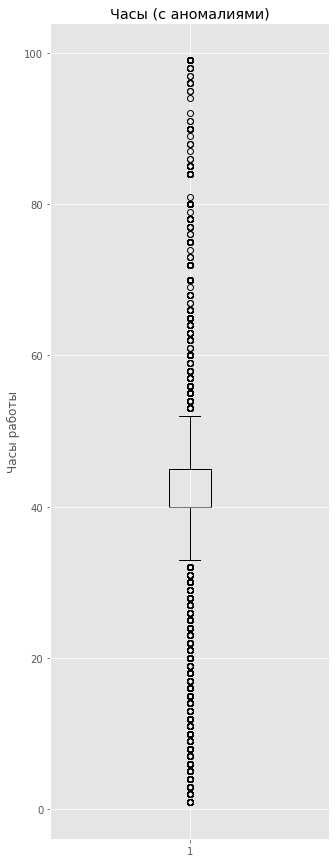

In [26]:
fig, ax = plt.subplots(figsize=(5, 15))
ax.boxplot(train_x["hours-per-week"])
ax.set_ylabel('Часы работы')
ax.set_title('Часы (с аномалиями)')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [27]:
is_outlier = (train_x["hours-per-week"] < boundaries[0]) | (train_x["hours-per-week"] > boundaries[1])
is_outlier.sum()

9136

In [28]:
train_x.loc[is_outlier, 'hours-per-week'] = int(boundaries[1])
is_outlier = (train_x["hours-per-week"] < boundaries[0]) | (train_x["hours-per-week"] > boundaries[1]) 
is_outlier.sum()

0

In [29]:
boundaries = calculate_outliers(test_x["hours-per-week"])
boundaries

(32.5, 52.5)

In [30]:
is_outlier = (test_x["hours-per-week"] < boundaries[0]) | (test_x["hours-per-week"] > boundaries[1])
is_outlier.sum()

1606

In [31]:
test_x.loc[is_outlier, 'hours-per-week'] = int(boundaries[1])
is_outlier = (test_x["hours-per-week"] < boundaries[0]) | (test_x["hours-per-week"] > boundaries[1]) 
is_outlier.sum()

0

## Стандартизация и работа с категориальными переменными

In [32]:
num_cols = [
    "age",
    "fnlwgt",
    "educational-num",
    "capital-gain",
    "capital-loss",
    "hours-per-week"
]

cat_cols = [
    "workclass",
    "occupation",
    "relationship",
    "race",
    "gender",
    "native-country"
]

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_mm = scaler.fit_transform(train_x[num_cols])
X_train_mm = pd.DataFrame(data = x_train_mm,  
                  columns =['age_std','educational-num_std', 'fnlwgt_std',
                           "capital-gain_std", "capital-loss_std",  "hours-per-week_std"])
x_test_mm = scaler.transform(test_x[num_cols])
X_test_mm = pd.DataFrame(data = x_test_mm,  
                  columns =['age_std','educational-num_std', 'fnlwgt_std',
                           "capital-gain_std", "capital-loss_std",  "hours-per-week_std"])
train_x = pd.concat([X_train_mm, train_x.reset_index(drop=True)], axis=1)
test_x = pd.concat([X_test_mm, test_x.reset_index(drop=True)], axis=1)
columns_for_drop = [ "educational-num","capital-gain", "capital-loss",
                    "hours-per-week", 'fnlwgt', "age", "marital-status"]
train_x = train_x.drop(columns=columns_for_drop) 
test_x = test_x.drop(columns=columns_for_drop) 

In [34]:
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(33212, 12) (5862, 12) (33212,) (5862,)


In [35]:
X_b = pd.concat([train_x, test_x], axis = 0, ignore_index = True) 
Y_b = pd.concat([train_y, test_y], axis = 0, ignore_index = True) 

In [36]:
print(X_b.shape, Y_b.shape)

(39074, 12) (39074,)


In [37]:
X_b

,age_std,educational-num_std,fnlwgt_std,capital-gain_std,capital-loss_std,hours-per-week_std,workclass,occupation,relationship,race,gender,native-country
0,2.072196,0.744113,-2.370531,1.298042,-0.216591,-0.765003,Private,Transport-moving,Husband,Black,Male,United-States
1,0.461170,0.584876,1.138756,-0.143906,-0.216591,1.310360,Private,Exec-managerial,Husband,White,Male,United-States
2,0.461170,-0.063066,-1.200769,-0.143906,-0.216591,-1.629738,Self-emp-not-inc,Craft-repair,Husband,White,Male,United-States
3,0.461170,0.032607,1.528677,-0.143906,-0.216591,-0.765003,Private,Sales,Husband,White,Male,United-States
4,-0.710485,0.616490,-1.200769,-0.143906,-0.216591,1.310360,Private,Other-service,Not-in-family,White,Female,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
39069,-1.296312,-0.879285,-0.031006,-0.143906,4.715532,-0.765003,Local-gov,Other-service,Not-in-family,White,Female,United-States
39070,-0.637256,1.736200,1.528677,13.503018,-0.216591,-0.765003,State-gov,Craft-repair,Not-in-family,White,Male,United-States
39071,1.779282,-1.029313,-0.031006,-0.143906,-0.216591,-0.765003,Private,Prof-specialty,Husband,White,Male,?
39072,-1.589226,-0.018506,-1.980611,-0.143906,4.020450,1.310360,Private,Handlers-cleaners,Own-child,White,Male,United-States


In [38]:
Y_b

0        0
1        1
2        0
3        1
4        0
        ..
39069    0
39070    1
39071    0
39072    0
39073    0
Name: is_rich, Length: 39074, dtype: int64

In [39]:
train_x.columns

Index(['age_std', 'educational-num_std', 'fnlwgt_std', 'capital-gain_std',
       'capital-loss_std', 'hours-per-week_std', 'workclass', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')

In [40]:
X_b.columns

Index(['age_std', 'educational-num_std', 'fnlwgt_std', 'capital-gain_std',
       'capital-loss_std', 'hours-per-week_std', 'workclass', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')

In [41]:
test_x.columns

Index(['age_std', 'educational-num_std', 'fnlwgt_std', 'capital-gain_std',
       'capital-loss_std', 'hours-per-week_std', 'workclass', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')

## Машинное обучение

In [42]:
f1 = make_scorer(f1_score, average='micro')

In [ ]:
N = []
f1 = []
for n in np.arange(10, 150, 5):
    rf = cb.CatBoostClassifier(logging_level='Silent', n_estimators = n)    
    rf.fit(train_x, train_y, cat_features=cat_cols)
    pred = rf.predict(test_x)
    N.append(n)
    f1.append(f1_score(test_y, pred, average='micro'))
f_imp_list3 = list(zip(N, f1))
f_imp_list3.sort(key = lambda x: x[1], reverse=True)
f_imp_list3

In [43]:
rf1 = cb.CatBoostClassifier(logging_level='Silent', n_estimators = 95)    
rf1.fit(X_b, Y_b, cat_features=cat_cols)
pred = rf1.predict(test_x)
print(f1_score(test_y, pred, average='micro'))

0.880416240191061


In [43]:
parameters = {'depth': [1, 4, 7, 10, 15, 20],
              'learning_rate': [0.03, 0.1, 0.15, 0.3, 0.9],
              'l2_leaf_reg': [1, 3, 5, 7, 9],
              "subsample": [0.3, 0.5, 0.7, 1],
              "random_strength": [1, 2, 5, 10, 20, 50, 100],
              "min_data_in_leaf": [5, 10, 20, 30, 40, 50, 70, 100, 150]}

cb = cb.CatBoostClassifier(logging_level='Silent', n_estimators = 95)
cv = RandomizedSearchCV(estimator = cb, param_distributions=parameters, scoring = f1, n_iter = 70, cv=3, n_jobs = -1)
cv.fit(train_x,train_y, cat_features=cat_cols)    
print(cv.best_params_)
print(cv.best_score_)

{'subsample': 0.5, 'random_strength': 1, 'min_data_in_leaf': 70, 'learning_rate': 0.3, 'l2_leaf_reg': 1, 'depth': 7}
0.8701675025160612


In [44]:
rf2 = cb.CatBoostClassifier(logging_level='Silent', n_estimators = 95,
                           depth=7, subsample=0.5, l2_leaf_reg=1,
                            random_strength = 1,
                            learning_rate=0.3, min_data_in_leaf = 70)    
rf2.fit(X_b, Y_b, cat_features=cat_cols)
pred = rf2.predict(test_x)
print(f1_score(test_y, pred, average='micro'))

0.8805868304332992
